## Problema

El precio de un sistema de energía solar es dado por:

$$U=35A +208V$$

dónde $A$ es la superficie del collector y $V$ es el volumen de la bateria que almacena la energía. Debido a consideraciones de balance de energía, se debe considerar que: 

$$A\left(290 - \frac{100}{V}\right) = 5833.3$$

Adicionalmente, el volumen de la batería $V$ está relacionado a la temperatura de operación del sistema $T$, y está configurado tal que:

$$V=\frac{50}{T-20}$$

Los proveedores de batería únicamente proveen modelos que trabajan entre 40 y 90 grados centígrados. Se desea optmizar el costo $U$ considerando todas las limitaciones presentadas.

## Solución

Juntando todas las expresiones y expresando en términos de $T$, tenemos la siguiente ecuación:

$$U=\frac{204165.5}{330 - 2T} + \frac{10400}{T - 20}$$

Puesto que la temperatura $T$ está limitada al rango $[40, 90]$, la función será ploteada en este rango.

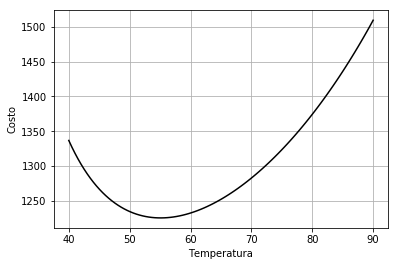

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

a = 40
b = 90
T = np.linspace(a, b, 100)
U = (204165.5)/(330-2*T) + (10400)/(T-20)

plt.figure()
plt.plot(T, U, 'k')
plt.xlabel('Temperatura')
plt.ylabel('Costo')
plt.grid()
plt.show()

## Métodos basados en gradiente

Puesto que en estos métodos se necesita calcular la derivada, se utilizará python para derivar la ecuación: 

$$U=\frac{204165.5}{330 - 2T} + \frac{10400}{T - 20}$$

Entonces la primera y segunda derivada se puede calcular de la siguiente manera:

In [3]:
import sympy

def calcularGradiente():
    T = sympy.Symbol('T')
    fU = (204165.5)/(330-2*T) + (10400)/(T-20)
    
    d1fU = sympy.diff(fU)
    
    print(fU)
    print(d1fU)
    
    return None

calcularGradiente()

10400/(T - 20) + 204165.5/(-2*T + 330)
-10400/(T - 20)**2 + 408331.0/(-2*T + 330)**2


In [4]:
def U(T):
    return 10400/(T - 20) + 204165.5/(-2*T + 330)

U(55.08)

1225.1656408350887

In [5]:
def d1U(T):
    return -10400/(T - 20)**2 + 408331.0/(-2*T + 330)**2

d1U(55.08)

-0.0022423688924249063

#### Algoritmo del método de la bisección

* **Paso 1:** Definir: $a$, $b$ y $\epsilon$.
* **Paso 2:** Calcular: $\alpha=\frac{a+b}{2}$, $f'(a)$ y $f'(\alpha)$.
    * **if** $f'(a)f'(\alpha)$ < 0
        - **then** $b=\alpha$.
        * **else** $a=\alpha$.
    * **if** $\lvert a-b\lvert > \epsilon$.
        * **then** goto Paso 2.
        * **else** goto Paso 3.
* **Paso 3:** Imprimir $a$ y $f(a)$.

In [15]:
def biseccion():
    a = 40
    b = 90
    epsilon = 0.001
    
    cont = 0
    registro = []
    
    while(True):
        alpha = (a+b)/2
        
        # Primera derivada en a
        dU_a = d1U(a)
        
        #Primera derivada en alpha
        dU_alpha = d1U(alpha)
        
        if(dU_a*dU_alpha < 0):
            b = alpha
        else:
            a = alpha
            
        Ua = U(a)    
        
        # Condicion de finalizacion
        if(np.abs(a-b) < epsilon):
            print('-------------------------------------------------------------')
            print("It: {:02} - Temp: {:.10f} - Costo {:.10f}".format(cont, a, Ua))
            break
            
        cont = cont + 1
        registro.append([cont, a, Ua])
        print("It: {:02} - Temp: {:.10f} - Costo {:.10f}".format(cont, a, Ua))
        
    return registro

        
reg1 = biseccion()

It: 01 - Temp: 40.0000000000 - Costo 1336.6620000000
It: 02 - Temp: 52.5000000000 - Costo 1227.4022222222
It: 03 - Temp: 52.5000000000 - Costo 1227.4022222222
It: 04 - Temp: 52.5000000000 - Costo 1227.4022222222
It: 05 - Temp: 54.0625000000 - Costo 1225.5036361287
It: 06 - Temp: 54.8437500000 - Costo 1225.1839888051
It: 07 - Temp: 54.8437500000 - Costo 1225.1839888051
It: 08 - Temp: 55.0390625000 - Costo 1225.1662656061
It: 09 - Temp: 55.0390625000 - Costo 1225.1662656061
It: 10 - Temp: 55.0390625000 - Costo 1225.1662656061
It: 11 - Temp: 55.0634765625 - Costo 1225.1657646744
It: 12 - Temp: 55.0756835938 - Costo 1225.1656564351
It: 13 - Temp: 55.0817871094 - Costo 1225.1656378426
It: 14 - Temp: 55.0817871094 - Costo 1225.1656378426
It: 15 - Temp: 55.0833129883 - Costo 1225.1656368938
-------------------------------------------------------------
It: 15 - Temp: 55.0833129883 - Costo 1225.1656368938


### Evaluación del método

Vamos a plotear el proceso de evolución que el algoritmo siguió para encontrar el mínimo.

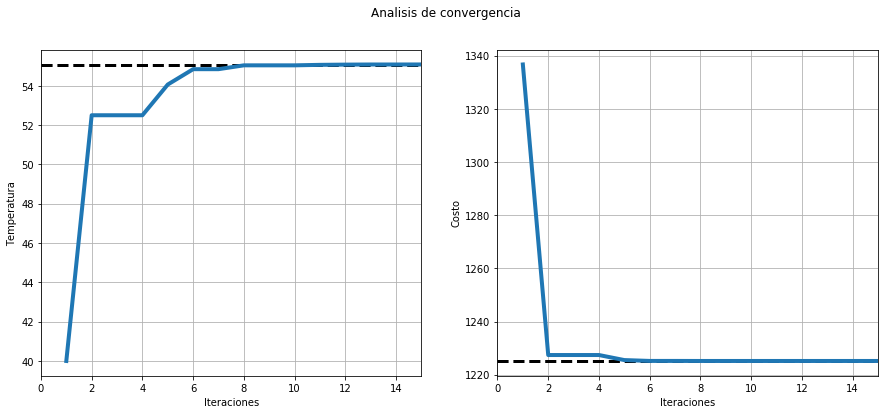

In [19]:
def evaluacion(reg):
    reg = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    fig.suptitle('Analisis de convergencia')
    
    axs[0].axhline(55.08, color='k', linewidth=3, linestyle='--')
    axs[0].plot(reg[:, 0], reg[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])
    
    axs[1].axhline(1225.17, color='k', linewidth=3, linestyle='--')
    axs[1].plot(reg[:, 0], reg[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])
    
    plt.show()
    
    
evaluacion(reg1)